# Aprendizaje por refuerzo - Frozen Lake
Voy utilizar [Gymnasium](https://gymnasium.farama.org/) 

Pruebo el primer ejemplo con frozen lake.

In [21]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

Creo el entorno.

In [22]:
lago = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="rgb_array")

Inicializamos los hiperparámetros:

In [23]:
alfa = 0.1 # Tasa de aprendizaje.
gamma = 0.99 # Factor de descuento.
epsilon = 1 # Tasa de exploración.
epsilon_decay = 0.00001 # Decaimiento del factor de exploración.

Iniciamos otros parámetros:

In [24]:
rng = np.random.default_rng()
episodios = 10_000
Q = np.zeros(shape=(lago.observation_space.n, lago.action_space.n))
recompensas = np.zeros(episodios)

Una función para elegir el estado.

In [25]:
def selecciona_accion(estado):
    if rng.random() < epsilon: 
        accion = lago.action_space.sample()
    else:
        accion = np.argmax(Q[estado, :])

    return accion

Entrenamiento.

In [26]:
step, terminado = 0, False

recompensas_por_episodio = np.zeros(episodios)

for episodio in range(episodios):
    estado = lago.reset()[0]
    terminado = False    

    while not terminado:  
        accion = selecciona_accion(estado)
        nuevo_estado, recompensa, terminado, _, _ = lago.step(accion)
        Q[estado, accion] += alfa * (recompensa + gamma*np.max(Q[nuevo_estado,:]) - Q[estado, accion])
        estado = nuevo_estado

    epsilon = max(epsilon - epsilon_decay, 0)

    if(epsilon == 0):
        alfa = 0.0001

    recompensas_por_episodio[episodio] = recompensa

lago.close()

Visualización de los resultados:

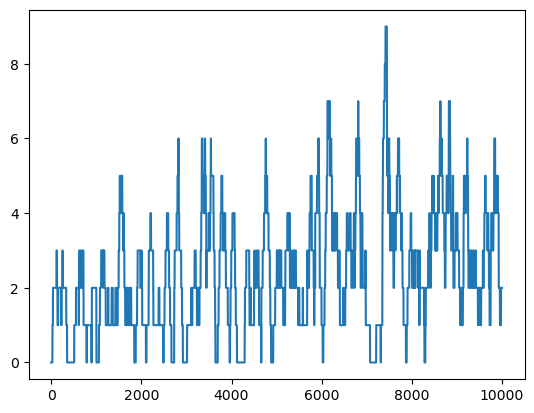

In [27]:
suma_recompensas = np.zeros(episodios)
for episodio in range(episodios):
    suma_recompensas[episodio] = np.sum(recompensas_por_episodio[max(0, episodio-100):(episodio+1)])

plt.plot(suma_recompensas)

Visualizamos cómo se comporta el agente después del entrenamiento.

In [ ]:
# Código para grabar el vídeo
tmp_lago = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="rgb_array")
lago = gym.wrappers.RecordVideo(env=tmp_lago, video_folder=".", name_prefix="video", episode_trigger=lambda x: x % 2 == 0)

# Código para visualizar el resultado.
# lago = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="human")


for i in range(1):
    estado = lago.reset()[0]
    lago.start_video_recorder()
    terminado = False
    
    while not terminado:
        accion = np.argmax(Q[estado,:])
        nuevo_estado, recompensa, terminado, _, _ = lago.step(accion)
        estado = nuevo_estado

lago.close_video_recorder()
lago.close()

Moviepy - Building video /mnt/fa2bd80f-9ba0-4b24-844c-5ad5cf7e71ba/Docencia/Curso2024-2025/IR2130/Ejemplos/Python/AprendizajePorRefuerzo/video-episode-0.mp4.
Moviepy - Writing video /mnt/fa2bd80f-9ba0-4b24-844c-5ad5cf7e71ba/Docencia/Curso2024-2025/IR2130/Ejemplos/Python/AprendizajePorRefuerzo/video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /mnt/fa2bd80f-9ba0-4b24-844c-5ad5cf7e71ba/Docencia/Curso2024-2025/IR2130/Ejemplos/Python/AprendizajePorRefuerzo/video-episode-0.mp4
Moviepy - Building video /mnt/fa2bd80f-9ba0-4b24-844c-5ad5cf7e71ba/Docencia/Curso2024-2025/IR2130/Ejemplos/Python/AprendizajePorRefuerzo/video-episode-0.mp4.
Moviepy - Writing video /mnt/fa2bd80f-9ba0-4b24-844c-5ad5cf7e71ba/Docencia/Curso2024-2025/IR2130/Ejemplos/Python/AprendizajePorRefuerzo/video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /mnt/fa2bd80f-9ba0-4b24-844c-5ad5cf7e71ba/Docencia/Curso2024-2025/IR2130/Ejemplos/Python/AprendizajePorRefuerzo/video-episode-0.mp4
